In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import re

sns.set(rc={"figure.figsize":(14, 10)})

In [2]:
os.getcwd()

'/Users/macbookpro/SeaPearlZoo/learning_cp/nqueens'

In [3]:
comparison = True

path = "exp_2022-05-05T12-01-00/"
path2 = "exp_2022-05-05T11-52-27/"

dir_list = os.listdir(path)
training = dict()
evaluation = dict()
for file in dir_list:
    m = re.search('.*_(.*).csv', file)
    if m:
        name = m.group(1)
        if name.startswith("training"):
            training[name] = pd.read_csv(path + file)
        else:
            evaluation[name] = pd.read_csv(path + file)

training_only_0 = dict()
evaluation_only_0 = dict()

for key, df in training.items():
    df["Heuristic"] = key
    training_only_0[key] = df[df["Solution"] == 0]

for key, df in evaluation.items():
    df["Heuristic"] = key
    evaluation_only_0[key] = df[df["Solution"] == 0]

total_evaluation_only_0 = pd.concat([df for df in evaluation_only_0.values()], axis=0, ignore_index=True)
total_trained_only_0 = total_evaluation_only_0[total_evaluation_only_0["Heuristic"].str.startswith("trained")]
total_training_only_0 = pd.concat([df for df in training_only_0.values()], axis=0, ignore_index=True)

if comparison:

    dir_list2 = os.listdir(path2)
    training2 = dict()
    evaluation2 = dict()
    for file in dir_list2:
        m2 = re.search('.*_(.*).csv', file)
        if m2:
            name2 = m2.group(1)
            if name2.startswith("training"):
                training2[name2] = pd.read_csv(path2 + file)
            else:
                evaluation2[name2] = pd.read_csv(path2 + file)

    training_only_0_2 = dict()
    evaluation_only_0_2 = dict()

    for key, df in training2.items():
        df["Heuristic"] = key
        training_only_0_2[key] = df[df["Solution"] == 0]

    for key, df in evaluation2.items():
        df["Heuristic"] = key
        evaluation_only_0_2[key] = df[df["Solution"] == 0]

    total_evaluation_only_0_2 = pd.concat([df for df in evaluation_only_0_2.values()], axis=0, ignore_index=True)
    total_trained_only_0_2 = total_evaluation_only_0_2[total_evaluation_only_0_2["Heuristic"].str.startswith("trained")]
    total_training_only_0_2 = pd.concat([df for df in training_only_0_2.values()], axis=0, ignore_index=True)

In [4]:
# training_only_0["training"].describe()
%matplotlib inline

In [16]:
sns.set(rc={"figure.figsize":(24, 16)})
fig, axs = plt.subplots(nrows=2, ncols=3)
sns.regplot(x= "Episode", y ="Nodes",
           data=total_evaluation_only_0[total_evaluation_only_0["Heuristic"] == "trained"], fit_reg=True, x_estimator=np.mean, ax=axs[0][0], label="Simple")
sns.regplot(data=total_evaluation_only_0[total_evaluation_only_0["Heuristic"] == "trained"], y="Reward", x="Episode",  logx=True, ax=axs[0][1], x_estimator=np.mean, label="Simple")
sns.scatterplot(data=total_evaluation_only_0[total_evaluation_only_0["Heuristic"] == "trained"], y="Loss", x="Episode", ax=axs[0][2], label="Simple")
sns.regplot(data=total_evaluation_only_0[total_evaluation_only_0["Heuristic"] == "trained"], y="Time", x="Episode" logx=True, ax=axs[1][0], x_estimator=np.mean, label="Simple")
sns.regplot(data=training_only_0["training"], y="Reward", x="Episode", scatter_kws={'alpha':0.3}, logx=True, ax=axs[1][1], label="Simple")
sns.scatterplot(data=training_only_0["training"], y="Loss", x="Episode", ax=axs[1][2], alpha=0.5, label="Simple")

sns.regplot(x= "Episode", y ="Nodes",
           data=total_evaluation_only_0_2[total_evaluation_only_0_2["Heuristic"] == "trained"], fit_reg=True, x_estimator=np.mean, ax=axs[0][0], label="Supervised")
sns.regplot(data=total_evaluation_only_0_2[total_evaluation_only_0_2["Heuristic"] == "trained"], y="Reward", x="Episode", logx=True, ax=axs[0][1], x_estimator=np.mean, label="Supervised")
sns.scatterplot(data=total_evaluation_only_0_2[total_evaluation_only_0_2["Heuristic"] == "trained"], y="Loss", x="Episode", ax=axs[0][2], label="Supervised")
sns.regplot(data=total_evaluation_only_0_2[total_evaluation_only_0_2["Heuristic"] == "trained"], y="Time", x="Episode" logx=True, ax=axs[1][0], x_estimator=np.mean, label="Supervised")
sns.regplot(data=training_only_0_2["training"], y="Reward", x="Episode", scatter_kws={'alpha':0.3}, logx=True, ax=axs[1][1], label="Supervised")
sns.scatterplot(data=training_only_0_2["training"], y="Loss", x="Episode", ax=axs[1][2], alpha=0.5, label="Supervised")
for i in range(2):
    for j in range(3):
        axs[i][j].legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-16-5aeb15ce7466>, line 7)

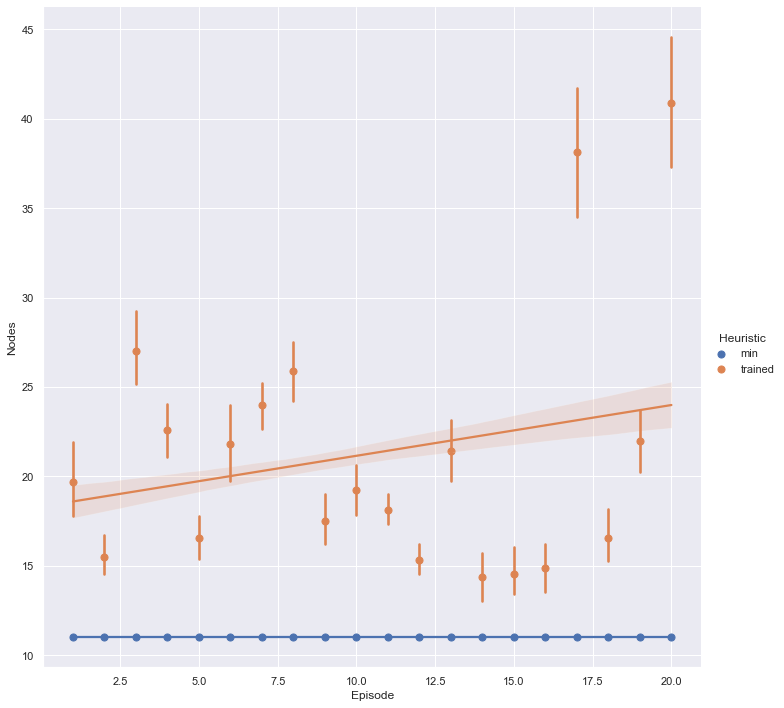

In [13]:
sns.set(rc={"figure.figsize":(14, 10)})
sns.lmplot(x= "Episode", y ="Nodes", hue="Heuristic",
           data=total_evaluation_only_0, fit_reg=True, x_estimator=np.mean, height=10)

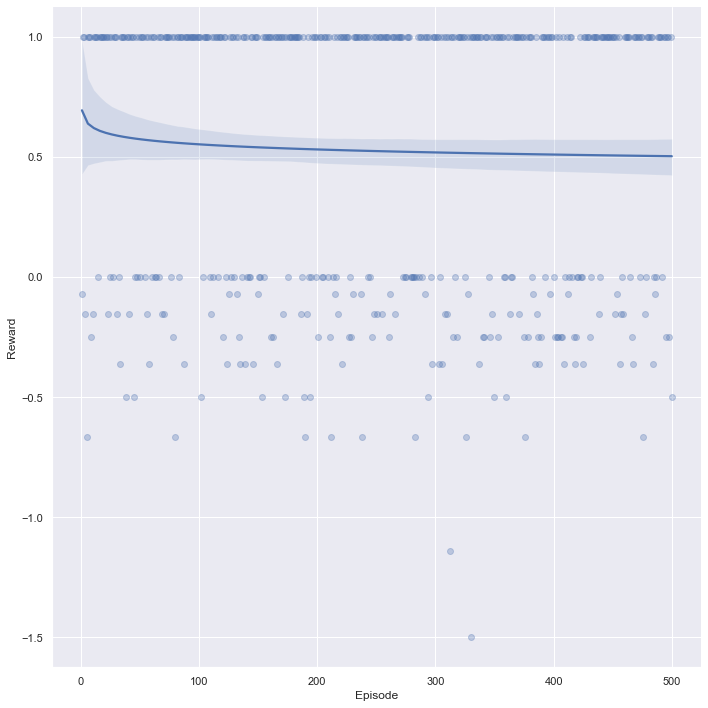

In [9]:
sns.lmplot(data=training_only_0["training"], y="Reward", x="Episode", height=10, scatter_kws={'alpha':0.3}, logx=True)

<AxesSubplot:xlabel='Episode', ylabel='Loss'>

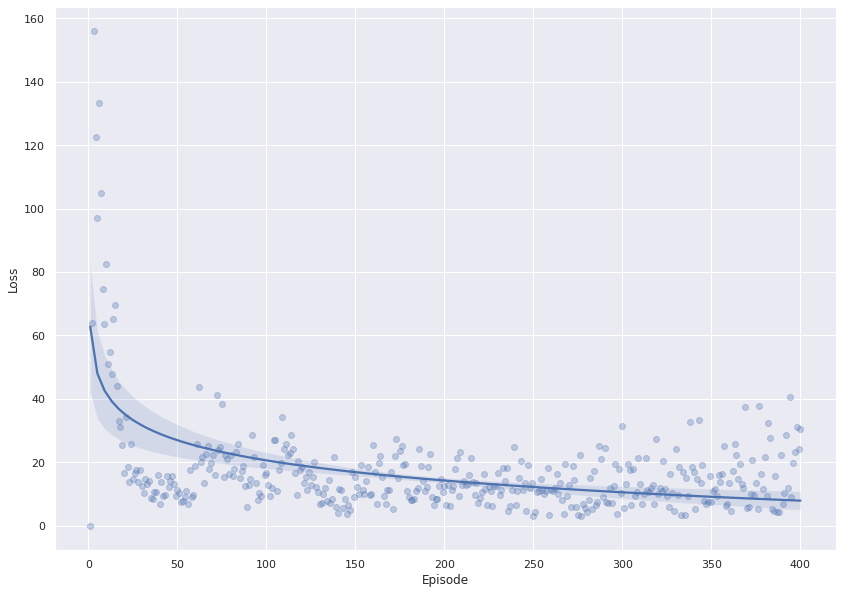

In [369]:
sns.regplot(data=training_only_0["training"], y="Loss", x="Episode", scatter_kws={'alpha':0.3}, logx=True)

<AxesSubplot:xlabel='Reward', ylabel='Count'>

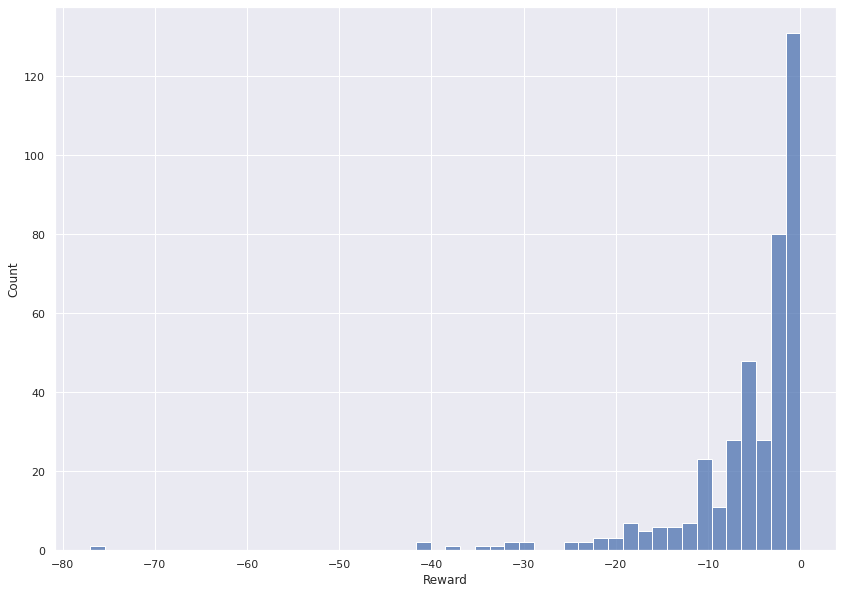

In [370]:
sns.histplot(training_only_0["training"], x="Reward")

<AxesSubplot:xlabel='Nodes', ylabel='Count'>

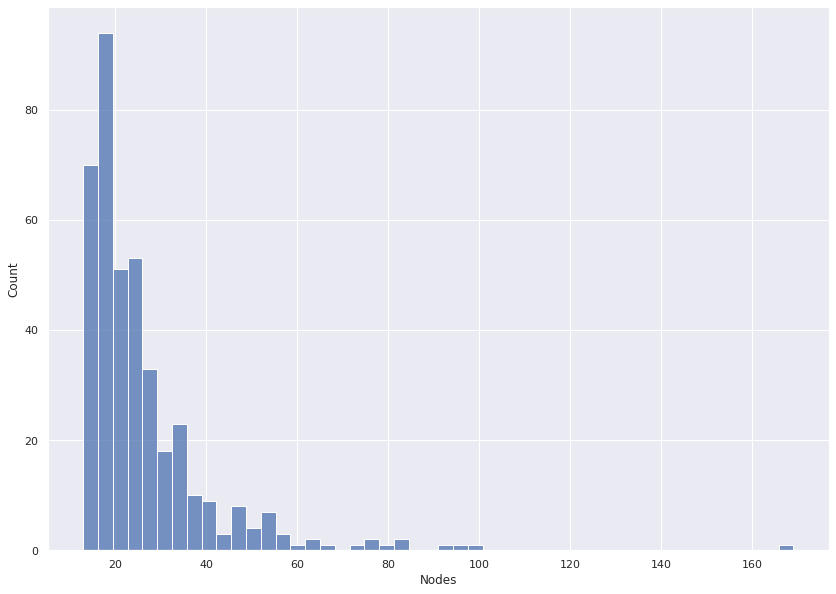

In [371]:
sns.histplot(training_only_0["training"], x="Nodes")

<AxesSubplot:xlabel='Episode', ylabel='Nodes'>

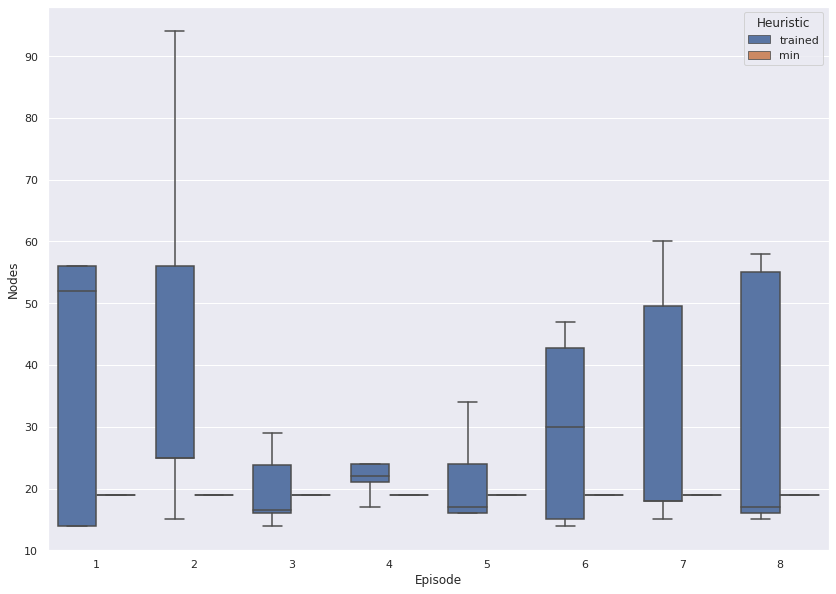

In [372]:
sns.boxplot(data=total_evaluation_only_0, y="Nodes", x="Episode", hue="Heuristic", showfliers = False)